## Data Exploration / About the Dataset: banking.csv 

The [dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be downloaded from here (https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv).

##### Input Variables
1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

##### Predict variable (desired target)
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

### Importing packages and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing #Every ML operations
import matplotlib.pyplot as plt #for visualisation
plt.rc("font", size=14) #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Exploring Dataset

In [2]:
data = pd.read_csv('Datasets\\banking.csv', header=0)#reading dataset
#pd.read_csv('D:\\Case study BSE\\Datasets\\banking.csv', header=0, Null values)
print(data.shape)
#data = data.dropna(how ="all")# removes the that row with ALL null values, not a single

(41188, 21)


In [3]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
#Explore the missing values and dropping where all columns are empty
#data = data.dropna(how ="all")
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

##### EDA

###### Barplot for the dependent variable

#### Analysing few important colums arbitrarily

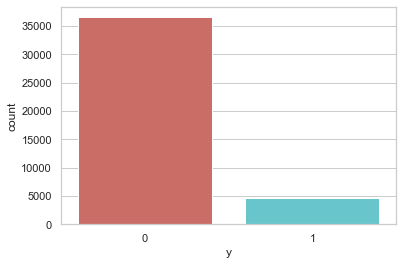

In [5]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

##### Customer job distribution

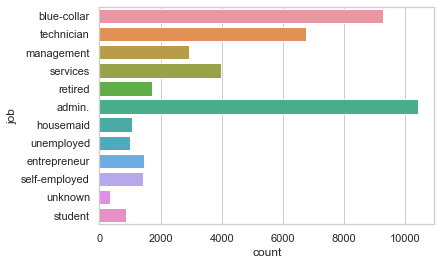

In [6]:
sns.countplot(y="job", data=data)#sns.countplot(x="column", orient)
plt.show()

###### Customer marital status distribution

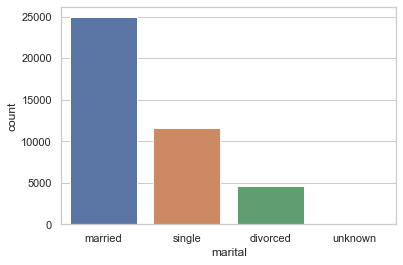

In [7]:
sns.countplot(x="marital", data=data)
plt.show()

In [8]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
data.groupby("marital").y.value_counts()

marital   y
divorced  0     4136
          1      476
married   0    22396
          1     2532
single    0     9948
          1     1620
unknown   0       68
          1       12
Name: y, dtype: int64

In [ ]:
#data.groupby("marital").y.value_counts()/len(data.groupby("marital")) to know in percentage

###### Barplot for credit in default

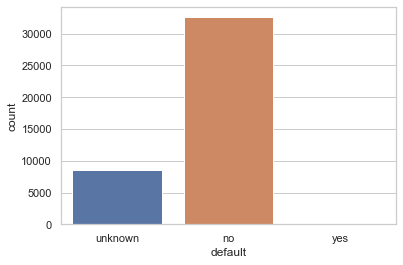

In [10]:
sns.countplot(x="default", data=data)
plt.show()

In [ ]:
#sns.hist(x=data.groupby("y").default) to do a distribution plot of the column y

###### Barplot for housing loan

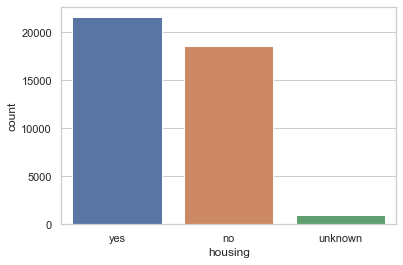

In [11]:
sns.countplot(x="housing", data=data)
plt.show()

###### Barplot for personal loan

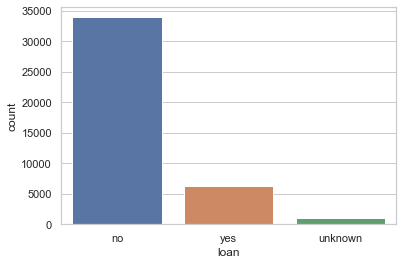

In [12]:
sns.countplot(x="loan", data=data)
plt.show()

##### Barplot for previous marketing campaign outcome


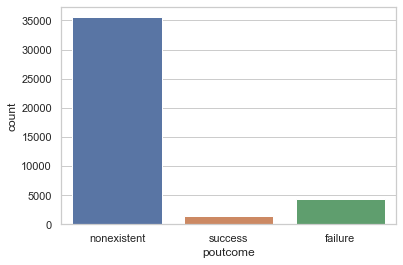

In [13]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.

In [15]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

### Data Preprocessing

##### Create dummy variables, that is variables with only two values, zero and one.
In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

#### pd.get_dummies() to convert categorical columns into numerical indicators

In [16]:
data2=pd.get_dummies(data, columns = ["job","marital","default","housing","loan","poutcome"])

In [17]:
data2.info()#Analysing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
y                       41188 non-null int64
job_admin.              41188 non-null uint8
job_blue-collar         41188 non-null uint8
job_entrepreneur        41188 non-null uint8
job_housemaid           41188 non-null uint8
job_management          41188 non-null uint8
job_retired             41188 non-null uint8
job_self-employed       41188 non-null uint8
job_services            41188 non-null uint8
job_student             41188 non-null uint8
job_technician          41188 non-null uint8
job_unemployed          41188 non-null uint8
job_unknown             41188 non-null uint8
marital_divorced        41188 non-null uint8
marital_married         41188 non-null uint8
marital_single          41188 non-null uint8
marital_unknown         41188 non-null uint8
default_no              41188 non-null uint8
default_unknown         41188 non-null uint8
default_yes             41188 non-nu

In [19]:
data2.info()
data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
y                       41188 non-null int64
job_admin.              41188 non-null uint8
job_blue-collar         41188 non-null uint8
job_entrepreneur        41188 non-null uint8
job_housemaid           41188 non-null uint8
job_management          41188 non-null uint8
job_retired             41188 non-null uint8
job_self-employed       41188 non-null uint8
job_services            41188 non-null uint8
job_student             41188 non-null uint8
job_technician          41188 non-null uint8
job_unemployed          41188 non-null uint8
job_unknown             41188 non-null uint8
marital_divorced        41188 non-null uint8
marital_married         41188 non-null uint8
marital_single          41188 non-null uint8
marital_unknown         41188 non-null uint8
default_no              41188 non-null uint8
default_unknown         41188 non-null uint8
default_yes             41188 non-nu

(41188, 29)

###### Drop the unknown columns

In [20]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Perfect! Exactly what we need for the next steps.

##### Check the independence between the independent variables

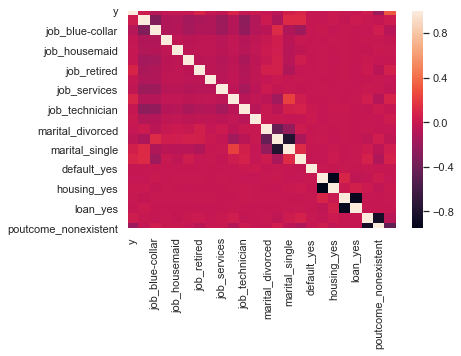

In [21]:
sns.heatmap(data2.corr(method="kendall"))
plt.show()
#Looks good.

In [23]:
correlations=data2.corr() #correlation across all festures including output columns
correlations

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
y,1.000000,0.031426,-0.074423,-0.016644,-0.006505,-0.000419,0.092221,-0.004663,-0.032301,0.093955,...,0.054133,0.099344,-0.003041,-0.011085,0.011743,0.005123,-0.004466,0.031799,-0.193507,0.316269
job_admin.,0.031426,1.000000,-0.313313,-0.111417,-0.094595,-0.160892,-0.121502,-0.110021,-0.190063,-0.085748,...,0.117787,0.121336,-0.004967,-0.008529,0.011128,-0.015485,0.020088,0.002771,-0.015560,0.025069
job_blue-collar,-0.074423,-0.313313,1.000000,-0.103050,-0.087492,-0.148810,-0.112378,-0.101759,-0.175791,-0.079308,...,-0.100192,-0.176579,-0.004594,0.014033,-0.016031,0.003089,-0.006127,-0.013254,0.043843,-0.061403
job_entrepreneur,-0.016644,-0.111417,-0.103050,1.000000,-0.031113,-0.052918,-0.039962,-0.036186,-0.062513,-0.028203,...,-0.060245,0.000974,-0.001634,-0.004567,0.004287,0.004789,-0.005449,0.001595,0.007598,-0.017238
job_housemaid,-0.006505,-0.094595,-0.087492,-0.031113,1.000000,-0.044929,-0.033929,-0.030723,-0.053075,-0.023945,...,-0.060971,-0.036846,-0.001387,0.003620,-0.004689,0.001319,-0.002905,-0.017853,0.014629,0.002276
job_management,-0.000419,-0.160892,-0.148810,-0.052918,-0.044929,1.000000,-0.057708,-0.052255,-0.090272,-0.040726,...,-0.067364,0.035478,-0.002359,0.007787,-0.007896,0.000953,-0.001201,0.009056,-0.007343,-0.001302
job_retired,0.092221,-0.121502,-0.112378,-0.039962,-0.033929,-0.057708,1.000000,-0.039462,-0.068171,-0.030756,...,-0.105345,-0.010113,-0.001782,0.001549,-0.002189,0.005822,-0.007076,0.020917,-0.054113,0.068061
job_self-employed,-0.004663,-0.110021,-0.101759,-0.036186,-0.030723,-0.052255,-0.039462,1.000000,-0.061730,-0.027849,...,-0.005950,0.004812,-0.001613,-0.000392,-0.001166,0.005143,-0.007624,-0.000741,0.007385,-0.012871
job_services,-0.032301,-0.190063,-0.175791,-0.062513,-0.053075,-0.090272,-0.068171,-0.061730,1.000000,-0.048110,...,0.004078,-0.017667,-0.002787,0.003889,-0.004799,-0.000978,-0.000247,0.010347,0.005760,-0.028558
job_student,0.093955,-0.085748,-0.079308,-0.028203,-0.023945,-0.040726,-0.030756,-0.027849,-0.048110,1.000000,...,0.216639,0.032601,-0.001257,-0.004941,0.004261,-0.004971,0.004350,0.040214,-0.079189,0.083321


##### difficult to understand correlation matrix values,as it is huge and complex in nature
##### Lets draw/plot a correlation plot

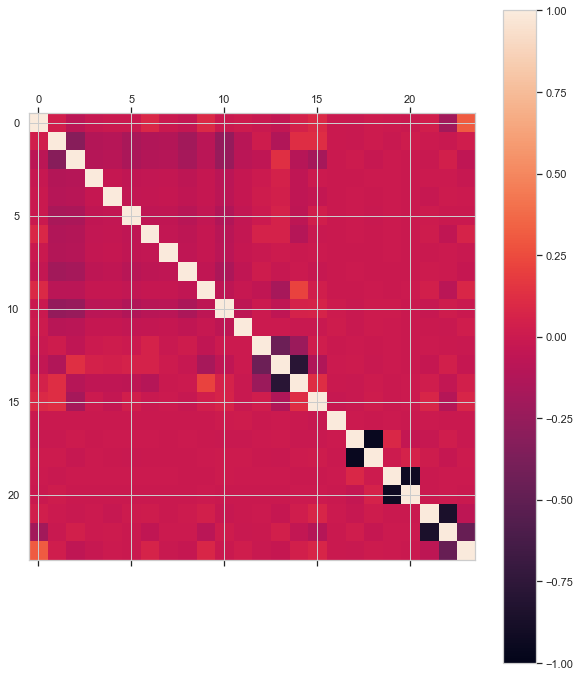

In [24]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [25]:
#You can use VIF to remove highly correlated columns

#### Feature selection based on correlation matrix
#### Removing columns with correlations greater than 0.9

In [26]:
columns = np.full((correlations.shape[0],), True, dtype=bool)
for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[0]):
        if correlations.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data2.columns[columns]
data_final_1 = data2[selected_columns]

In [27]:
data_final_1.shape#This removed 5 columns

(41188, 24)

###### Split the data into training and test sets and Check out training data is sufficient

In [28]:
X = data_final_1.iloc[:,1:]
y = data_final_1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)# by default 75/25 ratio for train and test set
X_train.shape

(30891, 23)

Great! Now we can start building our logistic regression model.

#### Logistic Regression Model

#### Fit logistic regression to the training set

In [29]:
classifier = LogisticRegression(random_state=0)#initialising the model
classifier.fit(X_train, y_train)#Traning over training set

C:\Users\kishan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and creating confusion matrix
The confusion_matrix() function will calculate a confusion matrix and return the result as an array.

In [30]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


The result is telling us that we have 9046+229 correct predictions and 912+110 incorrect predictions.
#### Accuracy

In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


#### Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.68      0.20      0.31      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.88     10297



Interpretation:  Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.
#### Classifier visualization playground
The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, we’ll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.

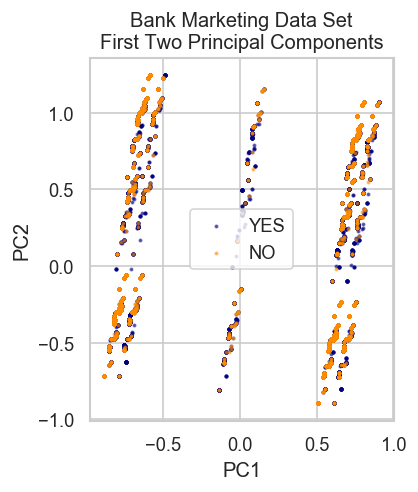

In [33]:
from sklearn.decomposition import PCA
X = data_final_1.iloc[:,1:]
y = data_final_1.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X) #plotting 2 principle components
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

As you can see, the PCA has reduced the accuracy of our Logistic Regression model. This is because we use PCA to reduce the amount of the dimension, so we have removed information from our data.

## for Improving the model
#### Choose best model out of several classification models
#### perform hyper tuning on best model
#### Do the prediction and evaluation
#### Understand the result and prediction